In [171]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib
%pip install scipy
%pip install keras
%pip install torch


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [172]:
import pandas as pd 
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import torch  # Importa a biblioteca PyTorch
import torch.nn as nn  # Importa o módulo de redes neurais do PyTorch
from sklearn.preprocessing import MinMaxScaler  # Importa o MinMaxScaler para normalização dos dados
from torch.utils.data import DataLoader, TensorDataset  # Importa DataLoader e TensorDataset para manipulação de dados em lotes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset





In [173]:
# Faz o download do dataset # URL do dataset no Kaggle 
# od.download("https://www.kaggle.com/datasets/hassan06/nslkdd/data")

# Análise exploratória

In [174]:
df_no_label = pd.read_csv("nslkdd/KDDTrain+.txt", header = None)
df_no_label.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [175]:
# adiciona rótulos as colunas 
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class_type'
,'level'])

# Carregando os conjuntos de dados de treinamento e teste
train_df = pd.read_csv('nslkdd/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('nslkdd/KDDTest+.txt', header=None, names=columns)

In [176]:
# Concatenando os DataFrames para criar um único DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

# Exibindo os tamanhos dos conjuntos resultantes
print(f"Tamanho do Conjunto de Dados Completo: {len(df)}")
print(f"Tamanho do Conjunto de Treinamento: {len(train_df)}")
print(f"Tamanho do Conjunto de Teste: {len(test_df)}")

Tamanho do Conjunto de Dados Completo: 148517
Tamanho do Conjunto de Treinamento: 125973
Tamanho do Conjunto de Teste: 22544


In [177]:
print("Conjunto dos dados completos")
df

Conjunto dos dados completos


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [179]:
df['protocol_type'].value_counts()




protocol_type
tcp     121569
udp      17614
icmp      9334
Name: count, dtype: int64

In [180]:
df['service'].value_counts()


service
http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [181]:
df['flag'].value_counts()


flag
SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: count, dtype: int64

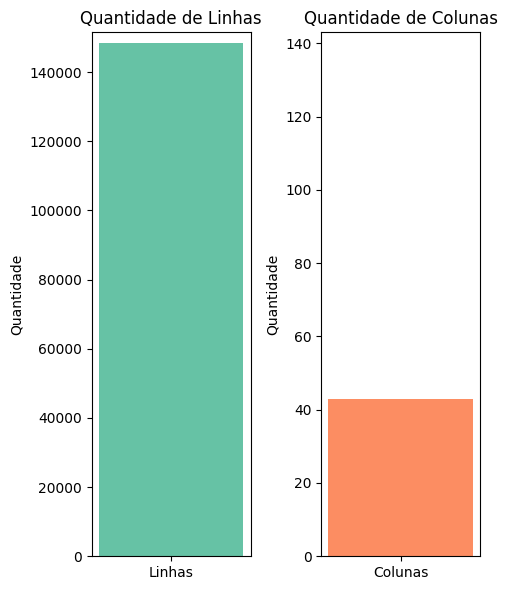

In [182]:
# Obtendo o tamanho do DataFrame
num_rows, num_cols = df.shape

# Criando gráfico de barras para linhas
plt.figure(figsize=(5, 6))

# Gráfico de barras para Linhas
plt.subplot(1, 2, 1)
plt.bar(['Linhas'], [num_rows], color='#66c2a5')
plt.title('Quantidade de Linhas')
plt.ylabel('Quantidade')
plt.ylim(0, num_rows + 3000)  # Ajusta o limite do eixo y para melhor visualização

# Gráfico de barras para Colunas
plt.subplot(1, 2, 2)
plt.bar(['Colunas'], [num_cols], color='#fc8d62')
plt.title('Quantidade de Colunas')
plt.ylabel('Quantidade')
plt.ylim(0, num_cols + 100)  # Ajusta o limite do eixo y para que 43 apareça claramente

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()

In [183]:
print("Conjunto de Treinamento")
train_df

Conjunto de Treinamento


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [184]:
print("Conjunto de Teste")
test_df

Conjunto de Teste


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [185]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Modelo de desenvolvimento

In [186]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [187]:
train_df['class_type'].value_counts()


class_type
normal             53952
neptune            32085
satan               3086
ipsweep             2650
smurf               2311
portsweep           2209
nmap                1083
back                 905
guess_passwd         890
mscan                686
warezmaster          672
teardrop             628
warezclient          609
apache2              521
processtable         462
snmpguess            228
saint                219
mailbomb             207
pod                  172
snmpgetattack        127
httptunnel            88
buffer_overflow       36
multihop              18
rootkit               17
land                  13
ps                    12
named                 11
ftp_write             10
loadmodule             9
sendmail               9
xterm                  8
imap                   7
phf                    6
xlock                  5
perl                   4
xsnoop                 3
udpstorm               2
sqlattack              1
Name: count, dtype: int64

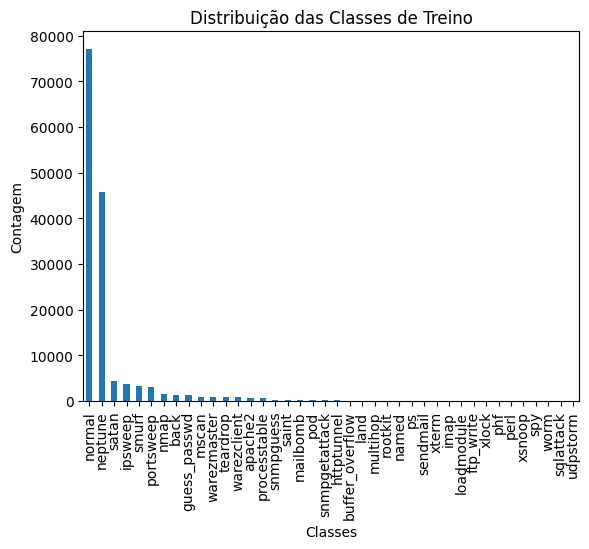

In [194]:
#distribuição dos dados nas classes 
df["class_type"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


In [190]:
train_df.class_type=train_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
train_df['class_type'].value_counts()



class_type
0    53952
1    50009
Name: count, dtype: int64

In [191]:
test_df.class_type=test_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
test_df['class_type'].value_counts()


class_type
0    23102
1    21454
Name: count, dtype: int64

In [192]:
# Realizando o One-Hot Encoding nas colunas categóricas
train_df = pd.get_dummies(train_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)

# Alinhando os DataFrames de treino e teste para garantir que eles tenham as mesmas colunas
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Selecionando apenas as colunas numéricas para normalização
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Normalizando os dados numéricos com MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df[numeric_cols])
X_test = scaler.transform(test_df[numeric_cols])

# Convertendo os dados normalizados para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Converte a matriz normalizada para um tensor PyTorch com tipo float32
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criando datasets e data loaders
train_dataset = TensorDataset(X_train_tensor) # Cria um conjunto de dados a partir do tensor
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Cria um DataLoader para gerar lotes aleatórios de tamanho 64
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Treinando o modelo

In [ ]:
# Definindo as dimensões do modelo
input_dim = X_train.shape[1]  # Obtém o número de características (colunas) dos dados normalizados
hidden_dim = 128  # Define o número de unidades na camada oculta
latent_dim = 32   # Define o número de dimensões na camada latente

# Definindo o modelo Variational Autoencoder (VAE)
class VAE(nn.Module):  # Define uma classe VAE que herda de nn.Module
    def __init__(self, input_dim, hidden_dim, latent_dim):  # Inicializador da classe
        super(VAE, self).__init__()  # Chama o inicializador da classe pai
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # Camada de entrada para camada oculta
        self.fc21 = nn.Linear(hidden_dim, latent_dim)  # Camada que gera a média da distribuição latente
        self.fc22 = nn.Linear(hidden_dim, latent_dim)  # Camada que gera a log variância da distribuição latente
        self.fc3 = nn.Linear(latent_dim, hidden_dim)  # Camada que gera a representação oculta a partir da amostra latente
        self.fc4 = nn.Linear(hidden_dim, input_dim)  # Camada que gera a saída final (dados reconstruídos)

    def encode(self, x):  # Método para codificar a entrada
        h1 = torch.relu(self.fc1(x))  # Passa a entrada pela primeira camada e aplica a função de ativação ReLU
        return self.fc21(h1), self.fc22(h1)  # Retorna as médias (mu) e log variâncias (logvar)

    def reparameterize(self, mu, logvar):  # Implementa o truque de reparametrização
        std = torch.exp(0.5 * logvar)  # Calcula o desvio padrão a partir da log variância
        eps = torch.randn_like(std)  # Gera ruído aleatório com a mesma forma que std
        return mu + eps * std  # Retorna uma amostra da distribuição

    def decode(self, z):  # Método para decodificar a amostra latente
        h3 = torch.relu(self.fc3(z))  # Passa a amostra pela camada oculta
        return torch.sigmoid(self.fc4(h3))  # Gera a saída final aplicando a função sigmoide

    def forward(self, x):  # Realiza o fluxo completo do VAE
        mu, logvar = self.encode(x.view(-1, input_dim))  # Codifica a entrada redimensionada
        z = self.reparameterize(mu, logvar)  # Amostra da distribuição latente
        return self.decode(z), mu, logvar  # Retorna a saída reconstruída, média e log variância

model = VAE(input_dim, hidden_dim, latent_dim)  # Instancia o modelo VAE

# Definindo a função de perda
def loss_function(recon_x, x, mu, logvar):  # Função que calcula a perda total
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')  # Calcula a perda de entropia cruzada
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # Calcula a divergência KL
    return BCE + KLD  # Retorna a perda total como a soma das duas perdas

# Treinamento
num_epochs = 150 # Define o número de épocas para treinamento
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Inicializa o otimizador Adam com taxa de aprendizado

# Loop de treinamento
for epoch in range(num_epochs):
    model.train()  # Coloca o modelo em modo de treinamento
    train_loss = 0  # Inicializa a perda do treinamento
    for batch_idx, (data,) in enumerate(train_loader):  # Loop sobre os lotes de dados
        optimizer.zero_grad()  # Zera os gradientes do otimizador
        data = data.view(-1, input_dim)  # Redimensiona os dados para a forma correta
        recon_batch, mu, logvar = model(data)  # Passa os dados pelo modelo

        # Verificando os limites dos dados reconstruídos e originais
        #if batch_idx == 0:  # Imprime apenas no primeiro batch
            # print("Recon Batch Min:", recon_batch.min().item(), "Max:", recon_batch.max().item())  # Imprime os limites dos dados reconstruídos
            # print("Data Min:", data.min().item(), "Max:", data.max().item())  # Imprime os limites dos dados de entrada

        loss = loss_function(recon_batch, data, mu, logvar)  # Calcula a perda
        loss.backward()  # Realiza a retropropagação
        train_loss += loss.item()  # Acumula a perda total
        optimizer.step()  # Atualiza os parâmetros do modelo
    
    train_loss /= len(train_loader.dataset)  # Calcula a média da perda por exemplo
    print(f'Epoch {epoch + 1} Loss: {train_loss:.4f}')  # Imprime a época atual e a perda média
  

Epoch 1 Loss: 7.6802
Epoch 2 Loss: 6.3150
Epoch 3 Loss: 6.1819
Epoch 4 Loss: 6.1209
Epoch 5 Loss: 6.0784
Epoch 6 Loss: 6.0449
Epoch 7 Loss: 6.0257
Epoch 8 Loss: 5.9937
Epoch 9 Loss: 5.9746
Epoch 10 Loss: 5.9575
Epoch 11 Loss: 5.9309
Epoch 12 Loss: 5.9294
Epoch 13 Loss: 5.9136
Epoch 14 Loss: 5.8990
Epoch 15 Loss: 5.8917
Epoch 16 Loss: 5.8908
Epoch 17 Loss: 5.8835
Epoch 18 Loss: 5.8771
Epoch 19 Loss: 5.8731
Epoch 20 Loss: 5.8661
Epoch 21 Loss: 5.8615
Epoch 22 Loss: 5.8543
Epoch 23 Loss: 5.8497
Epoch 24 Loss: 5.8483
Epoch 25 Loss: 5.8456
Epoch 26 Loss: 5.8402
Epoch 27 Loss: 5.8317
Epoch 28 Loss: 5.8398
Epoch 29 Loss: 5.8332
Epoch 30 Loss: 5.8249
Epoch 31 Loss: 5.8275
Epoch 32 Loss: 5.8195
Epoch 33 Loss: 5.8241
Epoch 34 Loss: 5.8229
Epoch 35 Loss: 5.8102
Epoch 36 Loss: 5.8154
Epoch 37 Loss: 5.8136
Epoch 38 Loss: 5.8050
Epoch 39 Loss: 5.8086
Epoch 40 Loss: 5.8040
Epoch 41 Loss: 5.8096
Epoch 42 Loss: 5.8111
Epoch 43 Loss: 5.8052
Epoch 44 Loss: 5.7998
Epoch 45 Loss: 5.7970
Epoch 46 Loss: 5.79

In [202]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Supondo que você já tenha seu DataFrame train_df e test_df
# Normalizando os dados numéricos com MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df[numeric_cols])
X_test = scaler.transform(test_df[numeric_cols])

# Extraindo os rótulos verdadeiros
y_test = test_df['class_type'].values  

# Convertendo os dados normalizados para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criando datasets e data loaders
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Função para calcular o erro de reconstrução (MSE)
def reconstruction_error(data, recon_data):
    return ((data - recon_data) ** 2).mean(dim=1)

# Função para calcular a acurácia
def calculate_accuracy(model, data_loader, true_labels, threshold):
    model.eval()
    predictions = []

    with torch.no_grad():
        for data in data_loader:
            inputs = data[0].view(-1, input_dim)  # Ajuste o tamanho do input conforme necessário
            recon_data, _, _ = model(inputs)

            # Calcula o erro de reconstrução
            errors = reconstruction_error(inputs, recon_data)

            # Classifica como 1 (anômalo) se erro > threshold; 0 (normal) caso contrário
            pred = (errors > threshold).float()
            predictions.extend(pred.numpy())

    # Calcule a acurácia
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Calcule a acurácia usando o DataLoader de teste
accuracy = calculate_accuracy(model, test_loader, y_test, threshold)
print(f'Acurácia do modelo: {accuracy:.2f}')



Acurácia do modelo: 0.52


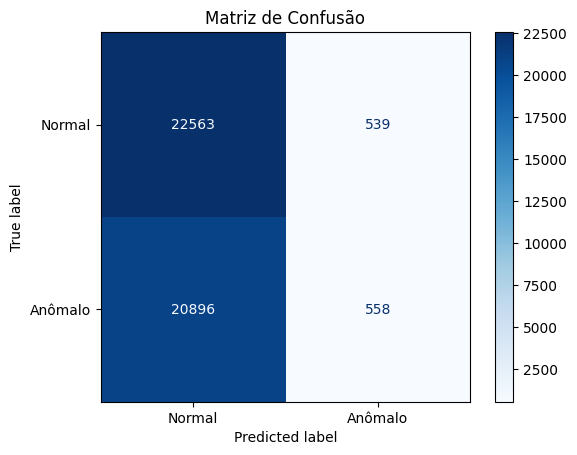

In [203]:

# Função para gerar a matriz de confusão
def generate_confusion_matrix(model, data_loader, true_labels, threshold):
    model.eval()
    predictions = []

    with torch.no_grad():
        for data in data_loader:
            inputs = data[0].view(-1, input_dim)
            recon_data, _, _ = model(inputs)

            # Calcula o erro de reconstrução
            errors = reconstruction_error(inputs, recon_data)

            # Classifica como 1 (anômalo) se erro > threshold; 0 (normal) caso contrário
            pred = (errors > threshold).float()
            predictions.extend(pred.numpy())

    # Gera e exibe a matriz de confusão
    cm = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matriz de Confusão")
    plt.show()

# Defina o limiar (threshold)
threshold = 0.05  # Ajuste o valor do limiar conforme necessário


# Gera e exibe a matriz de confusão usando o DataLoader de teste
generate_confusion_matrix(model, test_loader, y_test, threshold)
